![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 1. Generalized Linear Regression (Gaussian)

In this tutorial, we will explore Generalized Linear Models (GLMs), focusing on the Gaussian distribution, one of the most commonly used in GLMs. These models extend linear regression, enabling us to analyze a wider range of data types and relationships. We will start with an overview of GLM structure, discussing the random component (distribution), systematic component (predictors), and link function (mean transformation). We will establish a solid understanding of the fundamentals by constructing a GLM model using synthetic data without built-in R packages. Next, we will fit a GLM using R’s `glm()` function, interpreting the output to assess the influence of predictors and their statistical significance. We will also evaluate model performance and use R’s visualization libraries to create helpful graphics to interpret our results. This tutorial will equip you with the theoretical foundation and practical skills to confidently apply Gaussian GLMs in R for various statistical modeling applications.





## Overview

**Generalized Linear Models (GLMs)** with a Gaussian distribution are useful for modeling relationships between a continuous response variable and one or more explanatory variables when the error terms are normally distributed. This is a generalization of linear regression where the assumptions of `Gaussian` distribution apply. Here's an outline of the mathematical background and the steps to fit such a model.

1.  **Model Specification**:

    -   The model assumes that the dependent variable $Y$ follows a Gaussian (normal) distribution:
    
 $$ Y \sim \mathcal{N}(\mu, \sigma^2) $$

  -   Here, $\mu$ (the mean of $Y$) is modeled as a linear combination of predictors $X$, so:

 $$ \mu = X\beta $$

 -   Therefore, the model can be written as:

        $$ Y = X\beta + \epsilon $$

        where $\epsilon \sim \mathcal{N}(0, \sigma^2)$ represents the error term.

2.  **Link Function**:

    -   The identity link function is used for Gaussian models, meaning that we assume $E[Y | X] = X\beta$.

3.  **Parameter Estimation**:

    -   The coefficients $\beta$ are estimated by minimizing the sum of squared errors (SSE):

    $$ \text{SSE} = \sum_{i=1}^n (Y_i - X_i\beta)^2 $$

    -   The solution is given by:

    $$\beta = (X^T X)^{-1} X^T Y$$

    -   This is derived using calculus (specifically, by taking the derivative of SSE with respect to ( $\beta$ ), setting it to zero, and solving).

4.  **Prediction**:

    -   Once ( $\beta$ ) is estimated, we can predict new values of $Y$ as:

    $$ \hat{Y} = X\beta $$

5.  **Interpretation**:

    -   Each coefficient $\beta_j$ represents the change in $Y$ for a one-unit increase in $X_j$, holding other predictors constant.



## GLM Regresion Model from Scratch

To fit a Generalized Linear Model (GLM) with a Gaussian distribution in R without using any packages, we’ll walk through each step, from generating synthetic data to estimating the model parameters and creating a summary statistics table. Let’s break down each mathematical concept and translate it into R code.

Steps to Fit the Model in R are below:

### Generate Synthetic Data

We'll start by generating synthetic data with four covariates and a continuous response variable.

1.  **Define Number of Observations**: ( $n$ = 100 ).

2.  **Generate Covariates** ($X_1, X_2, X_3, X_4$ ) from a normal distribution with mean ( 0 ) and standard deviation ( 1 ).

3.  **Specify True Coefficients**: Choose known values for the coefficients ($\beta_0$ = 5 ) (intercept), ($\beta$ = \[1.5, -2.0, 0.5, 3.0\]).

4.  **Generate the Response Variable (\$Y)** using the formula:

    $$ Y = \beta\_0 + \beta\_1 X_1 + \beta\_2 X_2 + \beta\_3 X_3 + \beta\_4 X_4 + \epsilon$$

where $\epsilon \sim N(0, 1)$ represents Gaussian noise.

In [8]:
# Step 1: Generate Synthetic Data
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)
n = 100

# Generate covariates
X1 = np.random.normal(0, 1, n)
X2 = np.random.normal(0, 1, n)
X3 = np.random.normal(0, 1, n)
X4 = np.random.normal(0, 1, n)

# Define true coefficients
beta_0 = 5
beta_true = np.array([1.5, -2.0, 0.5, 3.0])

# Generate response variable Y
Y = beta_0 + beta_true[0]*X1 + beta_true[1]*X2 + beta_true[2]*X3 + beta_true[3]*X4 + np.random.normal(0, 1, n)

### Define the Design Matrix ( $X$ )

To estimate the coefficients, we need a design matrix ($X$) that includes an intercept term. The matrix ($X$) will look like this:

$$ X =
\begin{bmatrix}
1 & X_{1,1} & X_{1,2} & X_{1,3} & X_{1,4} \\
1 & X_{2,1} & X_{2,2} & X_{2,3} & X_{2,4} \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
1 & X_{n,1} & X_{n,2} & X_{n,3} & X_{n,4}
\end{bmatrix} $$

where the first column is all ones for the intercept, and the remaining columns are values of the covariates ( \$X_1, X_2, X_3, X_4 \$) for each observation.

In [9]:
# Step 2: Define Design Matrix X with Intercept
X = np.column_stack((np.ones(n), X1, X2, X3, X4))
print("Design Matrix (first 5 rows):\n", X[:5])

Design Matrix (first 5 rows):
 [[ 1.          0.49671415 -1.41537074  0.35778736 -0.82899501]
 [ 1.         -0.1382643  -0.42064532  0.56078453 -0.56018104]
 [ 1.          0.64768854 -0.34271452  1.08305124  0.74729361]
 [ 1.          1.52302986 -0.80227727  1.05380205  0.61037027]
 [ 1.         -0.23415337 -0.16128571 -1.37766937 -0.02090159]]



### Estimate Coefficients Using the Normal Equation

For Gaussian GLMs, estimating the coefficients ( $\beta$) reduces to solving the **Normal Equation**:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$

**Compute** $X^TX$: This is the matrix product of the transpose of ($X$) with ($X$).

**Compute** $(X^T X)^{-1}$: Invert the result from step 1.

**Compute** $X^T Y$: This is the product of the transpose of $X$ and the response vector ($Y$ ).

**Solve for** $\hat{\beta}$: Multiply the results from step 2 with step 3 to obtain the estimated coefficients.


In [10]:
# Step 3: Estimate Coefficients Using Normal Equation
XtX = X.T @ X
XtX_inv = np.linalg.inv(XtX)
XtY = X.T @ Y
beta_hat = XtX_inv @ XtY
print("Estimated Coefficients:\n", beta_hat)

Estimated Coefficients:
 [ 4.91119594  1.43078038 -1.79572418  0.41362802  3.24953456]


### Calculate Fitted Values and Residuals

-   \*\*Fitted Values $\hat{Y}$: Using the estimated coefficients $\hat{\beta}$, calculate the fitted values as:

$$ \hat{Y} = X \hat{\beta}$$

-   **Residuals**: Calculate the residuals, which represent the difference between the observed values $Y$ and fitted values $\hat{Y}$:

$$ \text{residuals} = Y - \hat{Y} $$


In [11]:
# Step 4: Calculate Fitted Values and Residuals
Y_hat = X @ beta_hat
residuals = Y - Y_hat
print("Residuals (first 5):\n", residuals[:5])

Residuals (first 5):
 [-0.9443495  -0.2459933   0.1159585   0.34380454 -0.458299  ]


### Compute Mean Squared Error (MSE) and Variance of Residuals

The Mean Squared Error (MSE) measures the average of the squared residuals:

$$\text{MSE} = \frac{1}{n}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

The variance of the residuals, used for calculating standard errors, is given by:

$$ \text{Var(residuals)} = \frac{1}{n - p - 1}\sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2$$

where ($p$ ) is the number of covariates (in our case, ( p = 4)

In [12]:
# Step 5: Calculate MSE and Variance of Residuals
mse = np.mean(residuals**2)
p = 4  # Number of covariates
variance_residuals = np.sum(residuals**2) / (n - len(beta_hat))

print(f"Mean Squared Error (MSE): {mse}")
print(f"Variance Residuals: {variance_residuals}")


Mean Squared Error (MSE): 1.0118140458194602
Variance Residuals: 1.0650674166520633


### Calculate Standard Errors and t-values for Coefficients

-   **Standard Errors**: The standard error for each coefficient ( \hat{\beta}\_j ) is given by:

$$ \text{Std Error}(\hat{\beta}*j) =* \sqrt{\text{Var(residuals)} \times [ (X^T X)^{-1} ]_{jj} } $$

where ( $[(X^T X)^{-1}]{jj}$ is the $j-th$ diagonal element of the inverse of $X^T X$\$

-   **t-values**: The t-value for each coefficient tests the null hypothesis that the coefficient is zero. It is calculated as:

$$t\text{-value} = \frac{\hat{\beta}_j}{\text{Std Error}(\hat{\beta}_j)}$$

In [ ]:
!pip install pandas scikit-learn matplotlib

In [13]:
import pandas as pd
import numpy as np

# Step 6: Calculate Standard Errors and t-values
std_errors = np.sqrt(variance_residuals * np.diag(XtX_inv))
t_values = beta_hat / std_errors

# Create Summary Table
summary_table = pd.DataFrame({
    'Coefficient': beta_hat,
    'Std Error': std_errors,
    't-value': t_values
})
print("Summary Table:\n", summary_table)


Summary Table:
    Coefficient  Std Error    t-value
0     4.911196   0.104764  46.878525
1     1.430780   0.119263  11.996806
2    -1.795724   0.109889 -16.341312
3     0.413628   0.097509   4.241942
4     3.249535   0.119226  27.255343


### Model Performance

Evaluating a Generalized Linear Model (GLM) involves several key metrics to assess its fit and predictive power. Below, I’ll outline the main evaluation metrics commonly used for a Gaussian GLM, along with their calculations.


#### Evaluation Matrix


1. ***Mean Squared Error (MSE)***:
   - Measures the average of the squares of the errors (residuals), which is the difference between the predicted and actual values.
   
   $$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $$

2. ***Root Mean Squared Error (RMSE)***:

   - The square root of MSE, providing an error metric in the same units as the response variable.
   
   $$ \text{RMSE} = \sqrt{\text{MSE}} $$
   

3. ***Mean Absolute Error (MAE)***:

   - Measures the average absolute errors, providing a straightforward interpretation of the average error magnitude.

   $$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y}_i|$$


4. ***R-squared ($R^2$)***:

   - Indicates the proportion of variance in the response variable that can be explained by the model.

   $$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}  $$
   where:
   
   - $\text{SS}_{\text{res}} = \sum_{i=1}^{n} (Y_i - \hat{Y}_i)^2 $
   - $\text{SS}_{\text{tot}} = \sum_{i=1}^{n} (Y_i - \bar{Y})^2 $

5. ***Adjusted R-squared***:

   - Adjusts the R-squared value based on the number of predictors in the model, providing a more accurate assessment when comparing models.
   
   $$ \text{Adjusted } R^2 = 1 - \left( \frac{(1 - R^2)(n - 1)}{n - p - 1} \right) $$
   
   where  $p$ is the number of predictors.

6. ***Akaike Information Criterion (AIC)***:

   - Provides a measure of model quality that accounts for the number of parameters.
   
   $$  \text{AIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + 2p  $$

7. ***Bayesian Information Criterion (BIC)***:

   - Similar to AIC but with a larger penalty for models with more parameters.
   
   $$   \text{BIC} = n \log\left(\frac{\text{SS}_{\text{res}}}{n}\right) + p \log(n)$$
   

In [14]:
# Step 7: Model Performance Metrics
# MSE (already calculated)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(Y - Y_hat))

# R-squared
ss_res = np.sum((Y - Y_hat)**2)
ss_tot = np.sum((Y - np.mean(Y))**2)
r_squared = 1 - (ss_res / ss_tot)

# Adjusted R-squared
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)

# AIC
aic = n * np.log(ss_res / n) + 2 * (p + 1)  # +1 for intercept

# BIC
bic = n * np.log(ss_res / n) + (p + 1) * np.log(n)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Mean Squared Error (MSE): 1.0118140458194602
Root Mean Squared Error (RMSE): 1.0058896787518303
Mean Absolute Error (MAE): 0.8010848719693233
R-squared: 0.9263958410884733
Adjusted R-squared: 0.9232967186079879
Akaike Information Criterion (AIC): 11.174480479106633
Bayesian Information Criterion (BIC): 24.200331409047088



#### K-fold Cross-validation

-   **Split the Data**: Randomly divide the dataset into $K$ equal-sized folds.

-   **Training and Testing**:

    -   For each fold, use $k-1$ folds for training the model and the remaining fold for testing.

    -   Repeat this process $k$ times, ensuring that each fold serves as the test set once.

-   **Model Fitting**: Fit the GLM on the training set for each iteration.

-   **Prediction**: Use the fitted model to make predictions on the test set.

-   **Performance Metrics**: Calculate evaluation metrics (e.g., MSE, RMSE, MAE, etc.) for each fold.

-   **Aggregate Results**: Compute the average and standard deviation of the performance metrics across all folds

In [15]:
# Step 8: K-fold Cross-Validation
k = 10
folds = np.random.choice(k, n, replace=True)
cv_mse = np.zeros(k)

for i in range(k):
    test_indices = np.where(folds == i)[0]
    train_indices = np.setdiff1d(np.arange(n), test_indices)
    
    X_train, Y_train = X[train_indices], Y[train_indices]
    X_test, Y_test = X[test_indices], Y[test_indices]
    
    # Fit model on training data
    XtX_train = X_train.T @ X_train
    XtX_inv_train = np.linalg.inv(XtX_train)
    XtY_train = X_train.T @ Y_train
    beta_hat_train = XtX_inv_train @ XtY_train
    
    # Predict on test set
    Y_pred = X_test @ beta_hat_train
    
    # Calculate MSE for this fold
    cv_mse[i] = np.mean((Y_test - Y_pred)**2)

average_cv_mse = np.mean(cv_mse)
print(f"Average K-Fold Cross-Validation MSE: {average_cv_mse}")

Average K-Fold Cross-Validation MSE: 1.0960584555061874


#### 1:1 Plot Predicted vs Observed Values

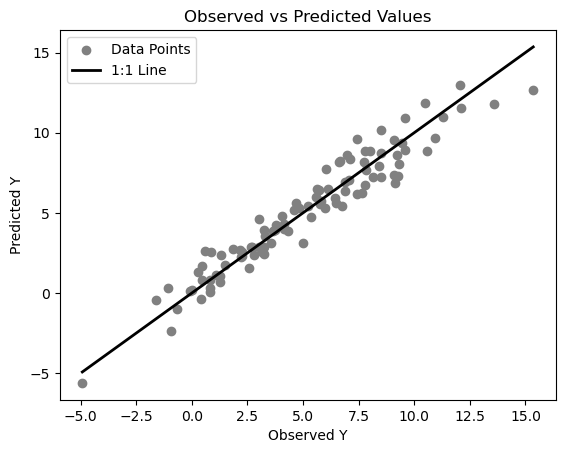

In [16]:
import matplotlib.pyplot as plt

# Plot Observed vs Predicted Values
plt.scatter(Y, Y_hat, c='grey', marker='o', label='Data Points')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k-', lw=2, label='1:1 Line')
plt.xlabel('Observed Y')
plt.ylabel('Predicted Y')
plt.title('Observed vs Predicted Values')
plt.legend()
plt.show()

## GLM Regression Model  with Python

In Python, GLMs can be implemented using the {statsmodels} library, which supports various distribution families (e.g., Gaussian, Poisson, Binomial) and link functions (e.g., identity, log, logit).

In [ ]:
# !pip install pandas numpy matplotlib seaborn plotnine scikit-learn statsmodels patsy

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.datasets import fetch_openml

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### Data Loading and Preparation


The **Boston Housing Dataset** contains 506 instances of housing data from suburbs of Boston, USA, in the 1970s. It is used for **regression tasks** to predict the **median value of owner-occupied homes (in $1000s)**.

**Features (13 attributes):**  
- CRIM: per capita crime rate  
- ZN: proportion of residential land zoned for large lots  
- INDUS: proportion of non-retail business acres  
- CHAS: Charles River dummy variable (1 if tract bounds river)  
- NOX: nitric oxide concentration  
- RM: average number of rooms per dwelling  
- AGE: proportion of owner-occupied units built before 1940  
- DIS: distances to employment centers  
- RAD: accessibility to radial highways  
- TAX: property tax rate  
- PTRATIO: pupil-teacher ratio by town  
- B: proportion of Black residents (formula-based)  
- LSTAT: percentage of lower-status population  

**Target**: MEDV — Median home value (response variable)

⚠️ **Note**: This dataset has been **retired from `sklearn.datasets.load_boston()`** due to ethical concerns (use of racial variables). It is now available via `fetch_openml('boston', version=1)` for historical use only.

**Use**: Teaching regression, evaluating models like linear regression, random forests, and neural networks.





We will apply following operation before fit a GLM regression model.

1.  **Feature engineering**: Feature engineering is a vital task in the data preparation process for data analysis, particularly for machine learning models. It is the practice of creating new features from existing ones or transforming them to enhance the machine learning algorithm's performance. Doing so makes achieving higher accuracy, better generalization, and a more straightforward interpretation of the model possible. Some standard techniques used in feature engineering include dimensionality reduction, feature scaling, and feature extraction. When performing feature engineering, it is essential to consider the data type, distribution, and target variable, among other factors.

We will create a new feature (Sand_Silt) by adding soil Silt and Sand percentage

2.  **Convert to factors**: As Land_type is categorical variable representing distinct categories rather than numerical values, we need to convert them into factors. This process will allow us to analyze and interpret the data more accurately, facilitating a better understanding of the underlying patterns and trends.

3.  **Data normalization**: It is a technique used in data analysis and machine learning. It involves adjusting numerical values to a standard range, usually between 0 and 1 or with a mean of 0 and a standard deviation of 1. This helps to improve the efficiency and accuracy of machine learning algorithms. Data normalization is important because it helps machine learning models work better. By standardizing the data, the models can more easily identify patterns and relationships in the data, which leads to better predictions and results.

In [50]:
# Load and prepare Boston Housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Set random seed for reproducibility
np.random.seed(123)

# Select relevant columns
df = df[['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

# Display data summary
print(df.head())
print(df.dtypes)

# Convert CHAS to category
df['CHAS'] = df['CHAS'].astype('category')

# Ensure RAD and TAX are numeric (in case they are integers)
df['RAD'] = df['RAD'].astype(float)
df['TAX'] = df['TAX'].astype(float)



   MEDV     CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0  24.0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1  21.6  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2  34.7  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3  33.4  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4  36.2  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  
MEDV        float64
CRIM        float64
ZN          float64
INDUS       float64
CHAS       category
NOX         float64
RM          float64
AGE         float64
DIS         float64
RAD        category
TAX         float64
PTRATIO     float64
B           float64
LSTAT       float64
dtype: object


#### Boxplot and Jitter Plot

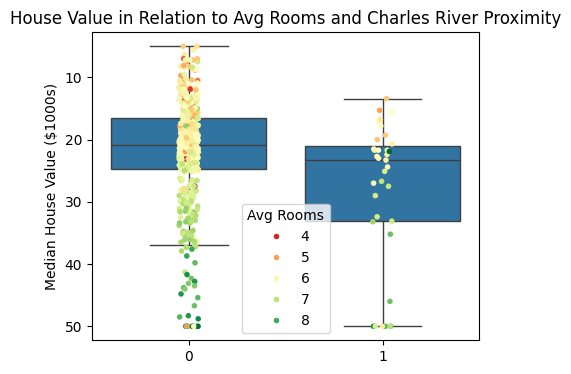

In [51]:
# Boxplot with jitter

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
sns.boxplot(y='MEDV', x='CHAS', data=df, flierprops={'marker': 'None'})
sns.stripplot(y='MEDV', x='CHAS', hue='RM', size=4, data=df, jitter=0.05, palette='RdYlGn')
plt.title('House Value in Relation to Avg Rooms and Charles River Proximity')
plt.xlabel('')
plt.ylabel('Median House Value ($1000s)')
plt.legend(title='Avg Rooms')
plt.gca().invert_yaxis()  
plt.show()

### Data Processing

In [52]:
# Apply one-hot encoding to CHAS
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)

# Split data into training (70%) and test (30%) sets
train, test = train_test_split(df, train_size=0.70, random_state=101)

# Feature scaling
scaler = StandardScaler()
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])

# Display scaled data summary
print("\nTraining set after scaling:")
print(train.head())
print("\nTest set after scaling:")
print(test.head()) 
  


Training set after scaling:
     MEDV      CRIM        ZN     INDUS       NOX        RM       AGE  \
204  50.0 -0.427041  4.098054 -1.282161 -1.239782  2.639295 -1.365925   
370  50.0  0.364268 -0.480070  0.955319  0.650002  1.129038  0.986637   
485  21.2  0.016472 -0.480070  0.955319  0.227901  0.084617 -0.648681   
86   22.5 -0.423182 -0.480070 -1.019525 -0.950466 -0.355998 -0.892544   
241  20.1 -0.416598  0.965653 -0.955680 -1.135136 -0.237314 -0.175299   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  CHAS_1  
204  0.669480 -0.656959 -1.101884 -1.758473  0.368488 -1.472062   False  
370 -1.228337  1.619728  1.474816  0.785740  0.384907 -1.460497    True  
485  0.123584  1.619728  1.474816  0.785740  0.347363 -0.358891   False  
86   0.334662 -0.770794 -0.967803 -0.000653  0.428035 -0.029277   False  
241  1.259870 -0.429291 -0.658832 -0.879563  0.413039 -0.095778   False  

Test set after scaling:
     MEDV      CRIM        ZN     INDUS       NOX        RM    

#### Suammry statistics

In [29]:
# Summary statistics
summary_stats = df[numeric_cols + ['MEDV']].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
              CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PTRATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.653063   
std   

#### Correlation with SAs

In [30]:
# Correlation with SAs
correlations = df[numeric_cols + ['MEDV']].corr()['MEDV'].drop('MEDV')
print("Correlation with MEDV:\n", correlations)

Correlation with MEDV:
 CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
Name: MEDV, dtype: float64


### Fit a GLM Regression Model

In the context of a GLM with continuous response variables, the focus is on regression problems where the dependent variable, which is being predicted, is continuous. This implies that the variable can take any value within a specific range, and the objective is to identify a correlation between the dependent variable and the independent variables that can be used to make accurate predictions.




In [ ]:
# !pip install statsmodels    

In [31]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Prepare data for GLM
X_train = train.drop('MEDV', axis=1)
y_train = train['MEDV']

# Convert categorical variables to dummy variables
#X_train = pd.get_dummies(X_train, columns=['Land_type'], drop_first=True)

# Ensure all columns in X_train are numeric
for col in X_train.columns:
    if X_train[col].dtype == 'object' or X_train[col].dtype.name == 'category':
        print(f"Warning: Non-numeric column detected: {col}, dtype: {X_train[col].dtype}")
        X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Ensure y_train is numeric
if y_train.dtype == 'object' or y_train.dtype.name == 'category':
    print(f"Warning: Non-numeric y_train detected, dtype: {y_train.dtype}")
    y_train = pd.to_numeric(y_train, errors='coerce')

# Check for non-numeric values in X_train
print("Checking X_train with np.asarray:\n", np.asarray(X_train).dtype)
print("Checking y_train with np.asarray:\n", np.asarray(y_train).dtype)

# Handle missing values
if X_train.isna().any().any():
    print("Missing values in X_train. Imputing with mean.")
    X_train.fillna(X_train.mean(), inplace=True)
if y_train.isna().any():
    print("Missing values in y_train. Imputing with median.")
    y_train.fillna(y_train.median(), inplace=True)

# Add intercept
X_train = sm.add_constant(X_train)


# Convert to float64 to ensure compatibility
X_train = X_train.astype(np.float64)
y_train = y_train.astype(np.float64)

# Fit GLM
try:
    fit_glm = sm.GLM(y_train, X_train, family=sm.families.Gaussian()).fit()
    print(fit_glm.summary())
except Exception as e:
    print(f"Error fitting GLM: {e}")
    print("X_train sample:\n", X_train.head())
    print("y_train sample:\n", y_train.head())

Checking X_train with np.asarray:
 object
Checking y_train with np.asarray:
 float64
                 Generalized Linear Model Regression Results                  
Dep. Variable:                   MEDV   No. Observations:                  354
Model:                            GLM   Df Residuals:                      340
Model Family:                Gaussian   Df Model:                           13
Link Function:               Identity   Scale:                          20.278
Method:                          IRLS   Log-Likelihood:                -1027.8
Date:                Sat, 09 Aug 2025   Deviance:                       6894.5
Time:                        05:39:02   Pearson chi2:                 6.89e+03
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9415
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------

### Plot Coefficients with 95% Confidence Intervals    

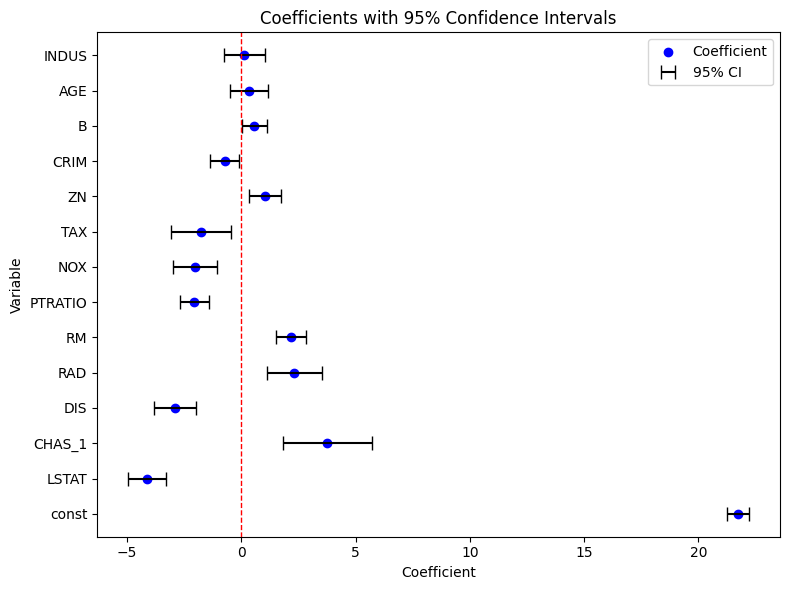

In [32]:
# Extract coefficients and confidence intervals
coef_table = fit_glm.summary2().tables[1]
coefs = np.array(coef_table['Coef.'])
ci_lower = np.array(coef_table['[0.025'])
ci_upper = np.array(coef_table['0.975]'])
variables = coef_table.index

# Create DataFrame for plotting
plot_data = pd.DataFrame({
    'Variable': variables,
    'Coef': coefs,
    'CI_Lower': ci_lower,
    'CI_Upper': ci_upper
})

# Sort by absolute coefficient value
plot_data = plot_data.sort_values(by='Coef', key=abs, ascending=False)

# Convert to NumPy arrays to avoid pandas indexing issues
coefs = np.array(plot_data['Coef'])
ci_lower = np.array(plot_data['CI_Lower'])
ci_upper = np.array(plot_data['CI_Upper'])
variables = np.array(plot_data['Variable'])

# Plot unstandardized coefficients with CIs
plt.figure(figsize=(8, 6))
y_pos = np.arange(len(variables))
plt.scatter(coefs, y_pos, color='blue', label='Coefficient')
plt.errorbar(
    x=coefs,
    y=y_pos,
    xerr=(coefs - ci_lower, ci_upper - coefs),
    fmt='none',
    c='black',
    capsize=5,
    label='95% CI'
)
plt.yticks(y_pos, variables)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.title('Coefficients with 95% Confidence Intervals')
plt.legend()
plt.tight_layout()
plt.show()

### Model Performance

In [33]:
# Predict on training set
y_pred_train = fit_glm.predict(X_train)

# Performance metrics
mse = np.mean((y_train - y_pred_train)**2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_train - y_pred_train))
ss_res = np.sum((y_train - y_pred_train)**2)
ss_tot = np.sum((y_train - y_train.mean())**2)
r_squared = 1 - (ss_res / ss_tot)
n, p = len(y_train), X_train.shape[1] - 1
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
aic = fit_glm.aic
bic = fit_glm.bic_llf

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")
print(f"AIC: {aic}")
print(f"BIC: {bic}")

MSE: 19.475903780713956
RMSE: 4.413151230211124
MAE: 3.073138872504543
R-squared: 0.7471263931918002
Adjusted R-squared: 0.7374576964608984
AIC: 2083.6974927674173
BIC: 2137.86764955129


### Visualization of Model Assumptions

To visualize the assumptions of a Generalized Linear Model (GLM) in Python, we need to check key assumptions for a Gaussian GLM (equivalent to linear regression in this case, as used in your code with `family=sm.families.Gaussian()`). The main assumptions for a Gaussian GLM are:
1. **Linearity**: The relationship between predictors and the response (via the identity link) is linear.
2. **Normality of Residuals**: Residuals should be approximately normally distributed.
3. **Homoscedasticity**: Residuals should have constant variance across fitted values.
4. **Independence**: Observations are independent (often assessed via study design or residual patterns).
5. **No Multicollinearity**: Predictors should not be highly correlated (optional, but useful to check).


We’ll create the following plots:

1. **Residuals vs. Fitted Values**: Checks linearity and homoscedasticity.
2. **Q-Q Plot**: Assesses normality of residuals.
3. **Scale-Location Plot**: Checks homoscedasticity by plotting standardized residuals against fitted values.
4. **Residuals vs. Predictors**: Checks linearity for each predictor (optional, included for key variables).
5. **VIF Plot (Optional)**: Visualizes Variance Inflation Factors to assess multicollinearity.




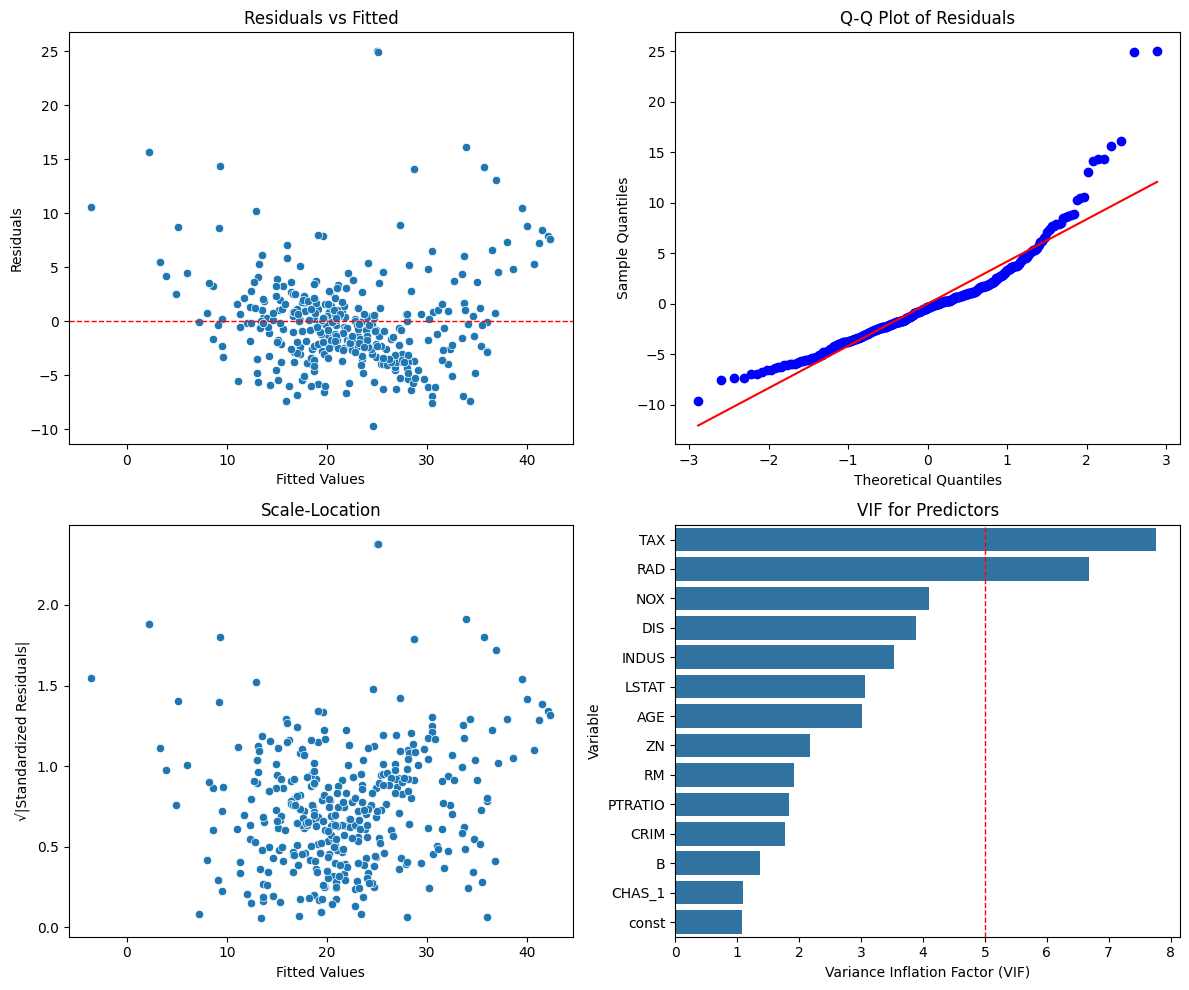

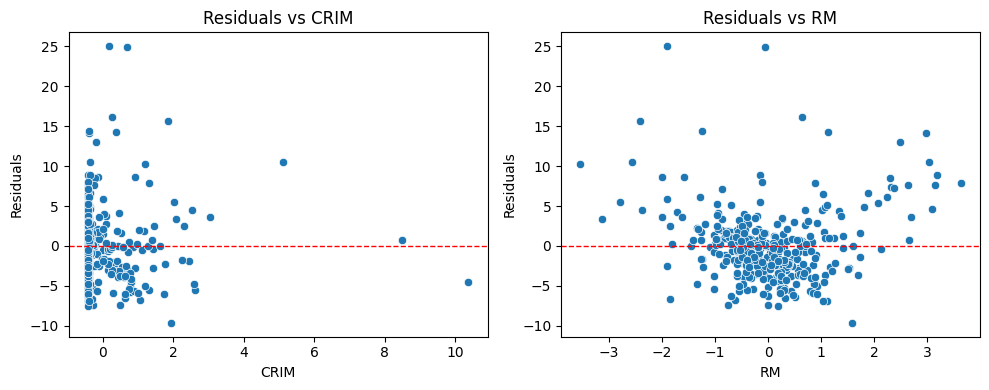

In [36]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats


# Get fitted values and residuals
y_pred = fit_glm.fittedvalues
residuals = y_train - y_pred
standardized_residuals = residuals / np.std(residuals)

# Create subplots for diagnostic plots
fig = plt.figure(figsize=(12, 10))

# 1. Residuals vs Fitted Values (Linearity and Homoscedasticity)
ax1 = fig.add_subplot(221)
sns.scatterplot(x=y_pred, y=residuals, ax=ax1)
ax1.axhline(0, color='red', linestyle='--', linewidth=1)
ax1.set_xlabel('Fitted Values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')

# 2. Q-Q Plot (Normality)
ax2 = fig.add_subplot(222)
stats.probplot(residuals, dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot of Residuals')
ax2.set_xlabel('Theoretical Quantiles')
ax2.set_ylabel('Sample Quantiles')

# 3. Scale-Location Plot (Homoscedasticity)
ax3 = fig.add_subplot(223)
sns.scatterplot(x=y_pred, y=np.sqrt(np.abs(standardized_residuals)), ax=ax3)
ax3.set_xlabel('Fitted Values')
ax3.set_ylabel('√|Standardized Residuals|')
ax3.set_title('Scale-Location')

# 4. VIF Plot (Multicollinearity)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
ax4 = fig.add_subplot(224)
sns.barplot(x='VIF', y='Variable', data=vif_data.sort_values('VIF', ascending=False), ax=ax4)
ax4.axvline(5, color='red', linestyle='--', linewidth=1)  # Common VIF threshold
ax4.set_xlabel('Variance Inflation Factor (VIF)')
ax4.set_title('VIF for Predictors')

plt.tight_layout()
plt.show()

# Optional: Residuals vs Key Predictors (e.g., CRIME, RM)
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
key_predictors = ['CRIM', 'RM']
for i, predictor in enumerate(key_predictors):
    if predictor in X_train.columns:
        sns.scatterplot(x=X_train[predictor], y=residuals, ax=axes[i])
        axes[i].axhline(0, color='red', linestyle='--', linewidth=1)
        axes[i].set_xlabel(predictor)
        axes[i].set_ylabel('Residuals')
        axes[i].set_title(f'Residuals vs {predictor}')
plt.tight_layout()
plt.show()

### Marginal Effects and Adjusted Predictions

The presentation of regression models, typically in the form of tables, is widely accepted as a clear and accessible method for interpreting results. However, for more intricate models that incorporate interaction or transformed terms, such as quadratic or spline terms, the use of raw regression coefficients may prove less effective, resulting in challenges when interpreting outcomes. In such cases, adjusted predictions or marginal means provide a more fitting solution. The use of visual aids can also assist in the comprehension of such effects or predictions, providing an intuitive understanding of the relationship between predictors and outcomes, even for complex models.



In [39]:
# Marginal effects for Land_type
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF to check multicollinearity (similar to check_collinearity in R)
vif_data = pd.DataFrame()
vif_data['Variable'] = X_train.columns
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("VIF:\n", vif_data)



VIF:
    Variable       VIF
0     const  1.078980
1      CRIM  1.768348
2        ZN  2.179566
3     INDUS  3.526131
4       NOX  4.098654
5        RM  1.911972
6       AGE  3.016015
7       DIS  3.882699
8       RAD  6.681688
9       TAX  7.763047
10  PTRATIO  1.838002
11        B  1.366565
12    LSTAT  3.071226
13   CHAS_1  1.085980


In [40]:
# Marginal effects (approximated for categorical variable)
chas_effects = fit_glm.get_prediction(X_train).summary_frame()
print("Marginal Effects for CHAS:\n", chas_effects)

Marginal Effects for CHAS:
           mean   mean_se  mean_ci_lower  mean_ci_upper
204  42.343839  1.298072      39.799664      44.888014
370  35.673915  1.255633      33.212920      38.134911
485  21.689771  0.772549      20.175602      23.203940
86   21.546057  0.549679      20.468705      22.623409
241  23.559697  0.630194      22.324540      24.794854
..         ...       ...            ...            ...
63   21.935144  0.768977      20.427977      23.442311
326  23.257976  0.643046      21.997628      24.518323
337  19.015122  0.677697      17.686860      20.343385
11   21.572284  0.833203      19.939236      23.205332
351  21.050585  1.141379      18.813523      23.287647

[354 rows x 4 columns]


**Marginal Effects**: These refer to the change in the dependent variable when an independent variable changes by one unit, while holding all other variables constant. In simpler terms, it tells us the impact of a small change in one variable on another variable, assuming everything else remains unchanged. Marginal effects are often calculated using derivatives in mathematical models. hey are not the same as marginal means or adjusted prediction

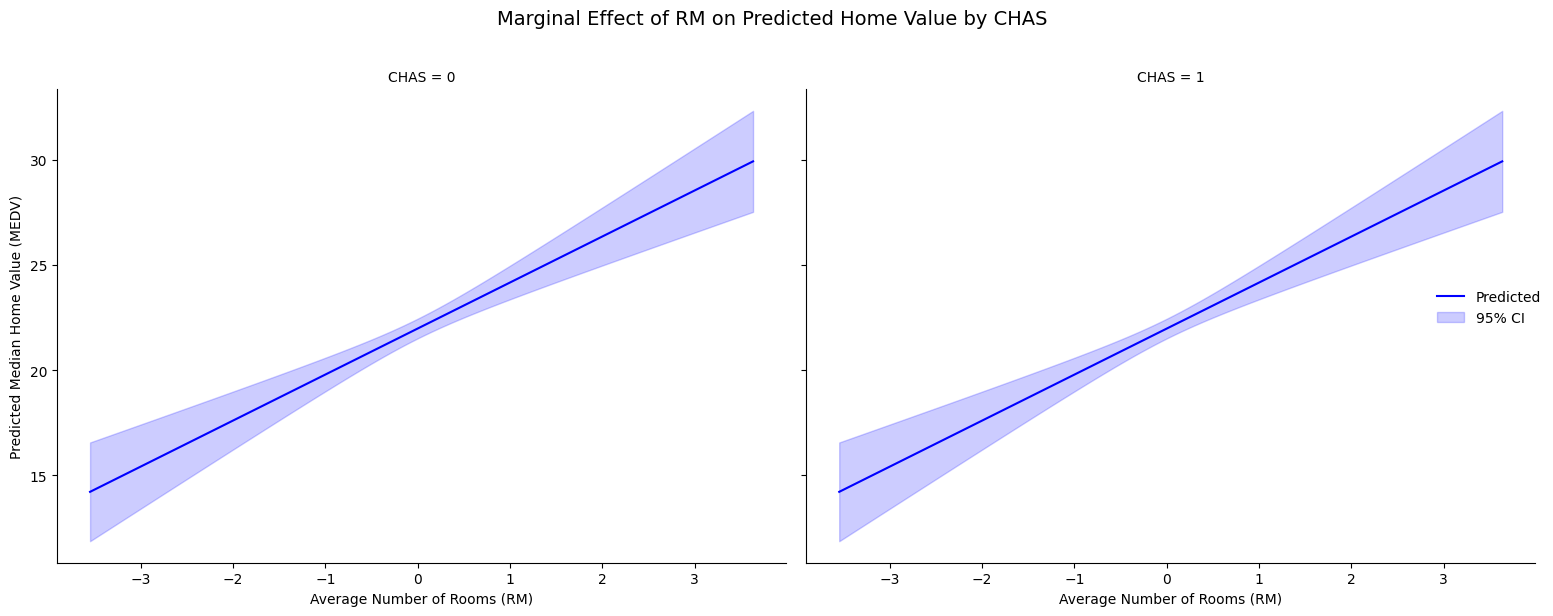

In [42]:
# Define range for RM (number of rooms)
rm_range = np.linspace(X_train['RM'].min(), X_train['RM'].max(), 100)

# Unique CHAS levels (0 and 1)
chas_levels = [0, 1]

# Prepare prediction data
pred_data = []
chas_labels = []

for chas in chas_levels:
    # Create base data: mean of all features
    temp_data = pd.DataFrame({
        col: np.repeat(X_train[col].mean(), 100) for col in X_train.columns
    })
    # Vary RM
    temp_data['RM'] = rm_range
    # Set CHAS to current level (note: CHAS is already a binary column)
    temp_data['CHAS'] = chas
    pred_data.append(temp_data)
    chas_labels.extend([chas] * 100)

# Concatenate all prediction data
pred_data = pd.concat(pred_data, ignore_index=True)

# Ensure column order matches training data
pred_data = pred_data[X_train.columns]

# Predict with confidence intervals
predictions = fit_glm.get_prediction(pred_data)
pred_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# Add predictions to pred_data
pred_data['Predicted'] = pred_summary['mean']
pred_data['CI_Lower'] = pred_summary['mean_ci_lower']
pred_data['CI_Upper'] = pred_summary['mean_ci_upper']
pred_data['CHAS'] = chas_labels  # Add CHAS group for plotting

# Convert CHAS to string/categorical for FacetGrid
pred_data['CHAS'] = pred_data['CHAS'].astype(str)

# -------------------------------
# Plot marginal effects
# -------------------------------
g = sns.FacetGrid(
    pred_data, 
    col='CHAS', 
    col_wrap=2, 
    height=6, 
    aspect=1.2
)
g.map(plt.plot, 'RM', 'Predicted', color='blue', label='Predicted')
g.map(plt.fill_between, 'RM', 'CI_Lower', 'CI_Upper', color='blue', alpha=0.2, label='95% CI')
g.set_titles('CHAS = {col_name}')
g.set_xlabels('Average Number of Rooms (RM)')
g.set_ylabels('Predicted Median Home Value (MEDV)')
g.fig.suptitle('Marginal Effect of RM on Predicted Home Value by CHAS', fontsize=14, y=1.02)
g.add_legend()
plt.tight_layout()
plt.show()

### Cross-validation

In [44]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(123)

# Load Boston Housing data
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

# Select relevant columns
columns = ['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df = df[columns].copy()


# Convert CHAS to category (it's binary: 0 or 1)
df['CHAS'] = df['CHAS'].astype('category')

# Ensure RAD and TAX are numeric
df['RAD'] = pd.to_numeric(df['RAD'], errors='coerce')
df['TAX'] = pd.to_numeric(df['TAX'], errors='coerce')

# Apply one-hot encoding to CHAS: creates CHAS_1 (since drop_first=True)
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)  # Now: CHAS_1

# Define predictors (X) and response (y)
X = df.drop('MEDV', axis=1).copy()
y = df['MEDV'].copy()

# Identify numeric columns for scaling (exclude dummy variables like CHAS_1)
numeric_cols = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Add intercept later (after scaling, within each fold)
# Convert to float64
X = X.astype(np.float64)
y = y.astype(np.float64)

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_mse = []

scaler = StandardScaler()

for train_idx, test_idx in kf.split(X):
    # Split data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Scale only numeric features, fit on training data
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Fit scaler on training data only, transform both
    X_train_scaled[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
    X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])  # Use same scaler

    # Add intercept (statsmodels does not include by default)
    X_train_scaled = sm.add_constant(X_train_scaled)
    X_test_scaled = sm.add_constant(X_test_scaled)

    # Ensure column order is the same
    X_train_scaled = X_train_scaled.reindex(sorted(X_train_scaled.columns), axis=1)
    X_test_scaled = X_test_scaled.reindex(sorted(X_test_scaled.columns), axis=1)

    # Fit GLM (Gaussian = linear regression)
    try:
        model = sm.GLM(y_train, X_train_scaled, family=sm.families.Gaussian()).fit()
        y_pred = model.predict(X_test_scaled)
        mse = np.mean((y_test - y_pred)**2)
        cv_mse.append(mse)
    except Exception as e:
        print(f"Error fitting GLM: {e}")
        print("X_train sample:\n", X_train_scaled.head())
        print("y_train sample:\n", y_train.head())
        raise

# Output CV results
print(f"\nCross-validated MSE: {np.mean(cv_mse):.3f} (+/- {2 * np.std(cv_mse):.3f})")
print(f"Cross-validated RMSE: {np.sqrt(np.mean(cv_mse)):.3f}")




Cross-validated MSE: 23.489 (+/- 3.685)
Cross-validated RMSE: 4.847


In [25]:
# Print cross-validation results
print("\nCross-validation MSE scores:", cv_mse)
print("Mean CV MSE:", np.mean(cv_mse))


Cross-validation MSE scores: [np.float64(10.52614382187896), np.float64(6.53984339915106), np.float64(8.848124335114155), np.float64(9.198093225695951), np.float64(7.536297753218865)]
Mean CV MSE: 8.5297005070118


### Predict on Test Data

In [53]:
# Prepare test data
X_test = test.drop('MEDV', axis=1)
y_test = test['MEDV']
X_test = sm.add_constant(X_test)

# Predict
test['Pred_MEDV'] = fit_glm.predict(X_test)

# Performance metrics
rmse = np.sqrt(np.mean((test['MEDV'] - test['Pred_MEDV'])**2))
mae = np.mean(np.abs(test['MEDV'] - test['Pred_MEDV']))
mse = np.mean((test['MEDV'] - test['Pred_MEDV'])**2)
mdae = np.median(np.abs(test['MEDV'] - test['Pred_MEDV']))

print(f"Test RMSE: {rmse}")
print(f"Test MAE: {mae}")
print(f"Test MSE: {mse}")
print(f"Test MDAE: {mdae}")

Test RMSE: 5.342994036256086
Test MAE: 3.835696361418936
Test MSE: 28.547585271468105
Test MDAE: 2.8517624711085485


### 1:1 Plot



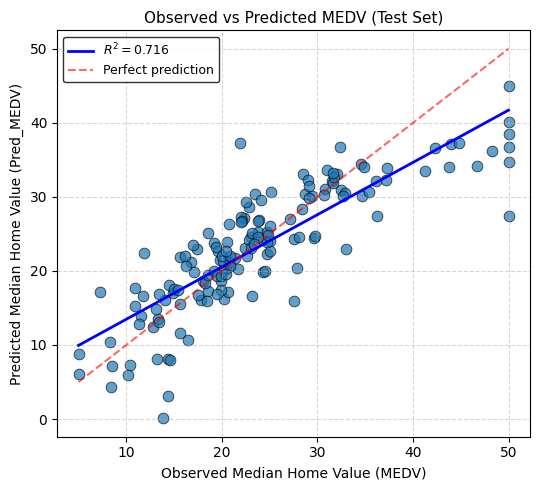

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Check for non-numeric or NaN values in observed and predicted MEDV
if test['MEDV'].isna().any() or test['Pred_MEDV'].isna().any():
    print("Warning: NaN values detected in 'MEDV' or 'Pred_MEDV'. Dropping rows with NaNs.")
    test = test.dropna(subset=['MEDV', 'Pred_MEDV'])

# Ensure both observed and predicted values are numeric
test['MEDV'] = pd.to_numeric(test['MEDV'], errors='coerce')
test['Pred_MEDV'] = pd.to_numeric(test['Pred_MEDV'], errors='coerce')

# Drop any remaining NaNs after conversion
test = test.dropna(subset=['MEDV', 'Pred_MEDV'])

# Scatter plot: Observed vs Predicted MEDV
plt.figure(figsize=(5.5, 5))
sns.scatterplot(x='MEDV', y='Pred_MEDV', data=test, alpha=0.7, edgecolor='k', s=60)

# Linear regression to get R²
slope, intercept, r_value, p_value, std_err = linregress(test['MEDV'], test['Pred_MEDV'])
r_squared = r_value ** 2

# Plot regression line
x_range = np.array([test['MEDV'].min(), test['MEDV'].max()])
plt.plot(x_range, slope * x_range + intercept, color='blue', linewidth=2, label=f'$R^2 = {r_squared:.3f}$')

# Add diagonal line (perfect prediction)
plt.plot(x_range, x_range, color='red', linestyle='--', alpha=0.6, label='Perfect prediction')

# Labels and title
plt.xlabel('Observed Median Home Value (MEDV)', fontsize=10)
plt.ylabel('Predicted Median Home Value (Pred_MEDV)', fontsize=10)
plt.title('Observed vs Predicted MEDV (Test Set)', fontsize=11)

# Legend and layout
plt.legend(frameon=True, fancybox=True, shadow=False, edgecolor='black', fontsize=9)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



## Summary and Conclusion


This comprehensive tutorial covered the essentials of conducting Generalized Linear Model (GLM) regression analysis with a Gaussian distribution with Python, from foundational concepts to advanced interpretation and evaluation techniques. We began by introducing the structure and key components of GLMs, particularly those that use the Gaussian distribution, and explored their suitability for continuous data. Building a GLM model from scratch allowed us to understand the model’s structure, including the linear predictors, error terms, and link functions.

Next, we used Python’s `statsmodels` library to fit a Gaussian GLM more efficiently and compared it with the simpler `lm()` function, which directly applies to linear models. The tutorial guided interpreting model outputs, including understanding coefficients, statistical significance, and key model metrics. For this, we leveraged a range of powerful Python packages such as `statsmodels`, `scikit-learn`, and `matplotlib` to streamline and enhance our interpretation and visualization of GLM outputs, making it easier to extract meaningful insights from the model.

We then addressed model performance evaluation using cross-validation and a hold-out test data set, demonstrating how these methods help assess model generalization and prevent overfitting. By using cross-validation and a separate test data set, we ensured a robust and unbiased estimate of model performance, essential for applying the model confidently to new data.
We also explored the visualization of model assumptions, including residuals analysis, to validate the model's fit and identify potential issues. This step is crucial for ensuring that the assumptions underlying GLMs are met, which enhances the reliability of our conclusions.

Finally, we discussed the importance of marginal effects and adjusted predictions in interpreting complex models, especially when dealing with interaction terms or transformed variables. These techniques provide a clearer understanding of how predictors influence the response variable, making it easier to communicate results to stakeholders.




## References

1.  [Statsmodels Documentation – GLM](https://www.statsmodels.org/stable/glm.html)

2. [An Introduction to GLMs" by Duke University (Stats 101 Guide)**](https://data.princeton.edu/wws509/stata/stata3)

3. [Python for Data Analysis – 3rd Edition by Wes McKinney (O’Reilly)](https://wesmckinney.com/pages/book.html)

4. [Towards Data Science: “Understanding GLMs in Python” (Medium Article)](https://towardsdatascience.com/generalized-linear-models-in-python-d2b42b8d8a77)

5. [GLM with scikit-learn and statsmodels – Kaggle Notebook - "Generalized Linear Models in Python"](https://www.kaggle.com/code/alexanderkireev/generalized-linear-models-in-python)

